In [12]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.pyplot as plt


fiber_bend_data= pd.read_csv('./data/FiberBend/Raw25-15-1.csv')

print fiber_bend_data.head()

df = fiber_bend_data[1:]
print df.head()

      Time Extension      Load
0    (sec)      (mm)       (N)
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
      Time Extension      Load
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
5  0.40000  -0.11802   0.05204


In [47]:
def makeDataframe(csvPath):
    df = pd.read_csv(csvPath)
    df = df[1:]
    return df

In [78]:
df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
print df.head()

      Time Extension      Load
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
5  0.40000  -0.11802   0.05204


In [77]:
def graphDataframe(df):
    
    ext = df['Extension']
    load = df['Load']

    ext = [float(x) for x in ext]
    load = [float(y) for y in load]
    fig = plt.figure()
    
    fig.set_size_inches(10,10)  # OR
    plt.scatter(ext, load)

    fig.suptitle('Extension vs Load', fontsize=20)
    plt.xlabel('Extension (mm)', fontsize=18)
    plt.ylabel('Load (N)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()


In [76]:
def opposite(x):
    return -float(x)

def rotateGraph(df):
    """Returns opposites of values so graphs are correct with values"""    
    df['Extension'] = df['Extension'].apply(opposite)
    df['Load'] = df['Load'].apply(opposite)

    return df
        

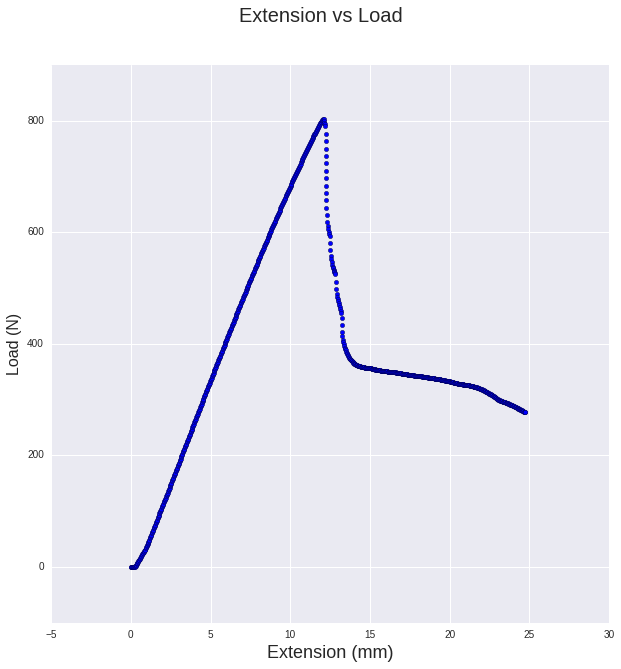

In [79]:
df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
df = rotateGraph(df)
graphDataframe(df)